In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
import scipy

In [2]:
#Grabbing data set into jupyter notebook based on coursera course
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
print(boston_df)

     Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

       TAX  PTRATIO  LSTAT  MEDV  
0   

In [3]:
print(boston_df['CHAS'])

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64


In [4]:
print(boston_df[['MEDV', 'AGE']])

     MEDV   AGE
0    24.0  65.2
1    21.6  78.9
2    34.7  61.1
3    33.4  45.8
4    36.2  54.2
..    ...   ...
501  22.4  69.1
502  20.6  76.7
503  23.9  91.0
504  22.0  89.3
505  11.9  80.8

[506 rows x 2 columns]


[Text(0.5, 0, 'Median Val of Owner-Occupied Homes')]

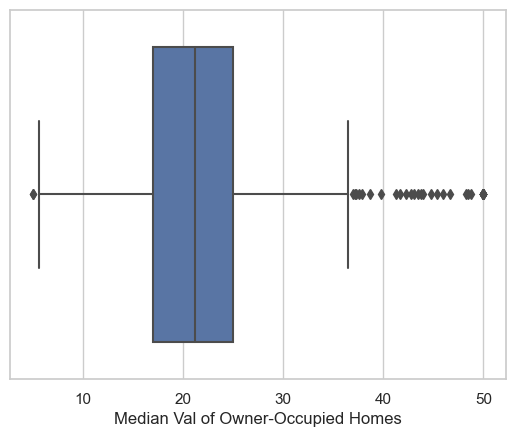

In [5]:
#Creating Visuals required in Task 2
#Setting style
sns.set(style='whitegrid')
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(data=boston_df, x="MEDV").set(xlabel = 'Median Val of Owner-Occupied Homes')

[Text(0, 0.5, 'Median Value of Houses Bounded by Charles River'),
 Text(0.5, 0, 'Bounded = 1, unbounded = 0')]

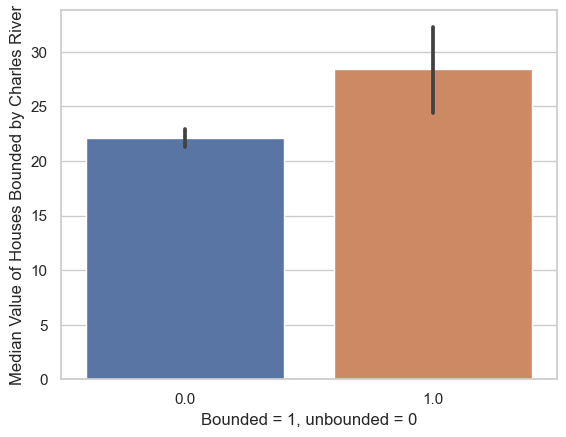

In [6]:
#Provide a  bar plot for the Charles river variable
sns.barplot(data=boston_df, x='CHAS', y="MEDV").set(ylabel = 'Median Value of Houses Bounded by Charles River', 
                                                   xlabel = 'Bounded = 1, unbounded = 0')

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, 'Median Val of Owner-Occupied Homes')]

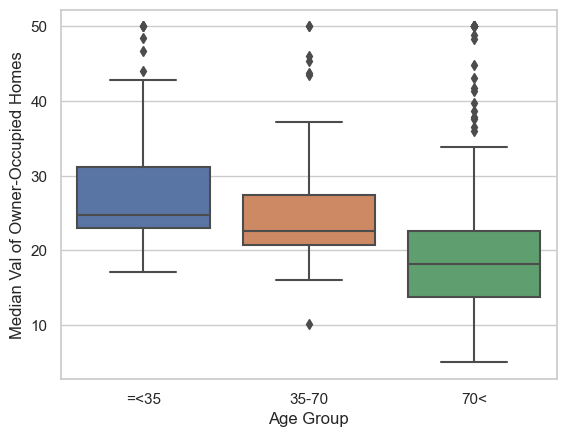

In [7]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 
#years and younger, between 35 and 70 years and 70 years and older)
#Creating New Column that groups up age group
bins = [0,35,70,100]
labels = ['=<35', '35-70', '70<']
boston_df['AGE_GRP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)
#Creating Chart
sns.boxplot(data=boston_df, x="AGE_GRP", y="MEDV").set(xlabel = 'Age Group', ylabel = 'Median Val of Owner-Occupied Homes')

<Axes: xlabel='NOX', ylabel='INDUS'>

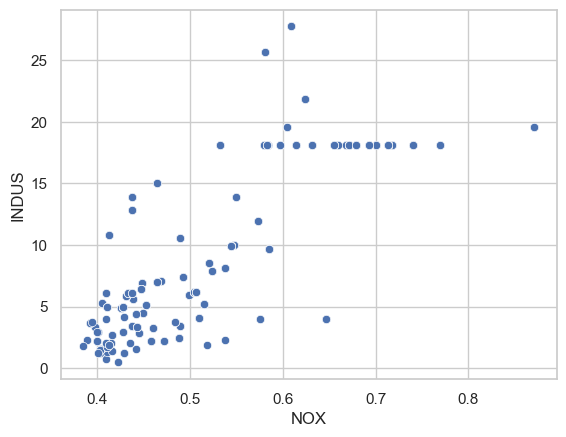

In [8]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion
#of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(data=boston_df, x="NOX" , y="INDUS")
#Can say that there is an upwards trend with NOX and INDUS until about 0.6 and then it looks like it hits a limit

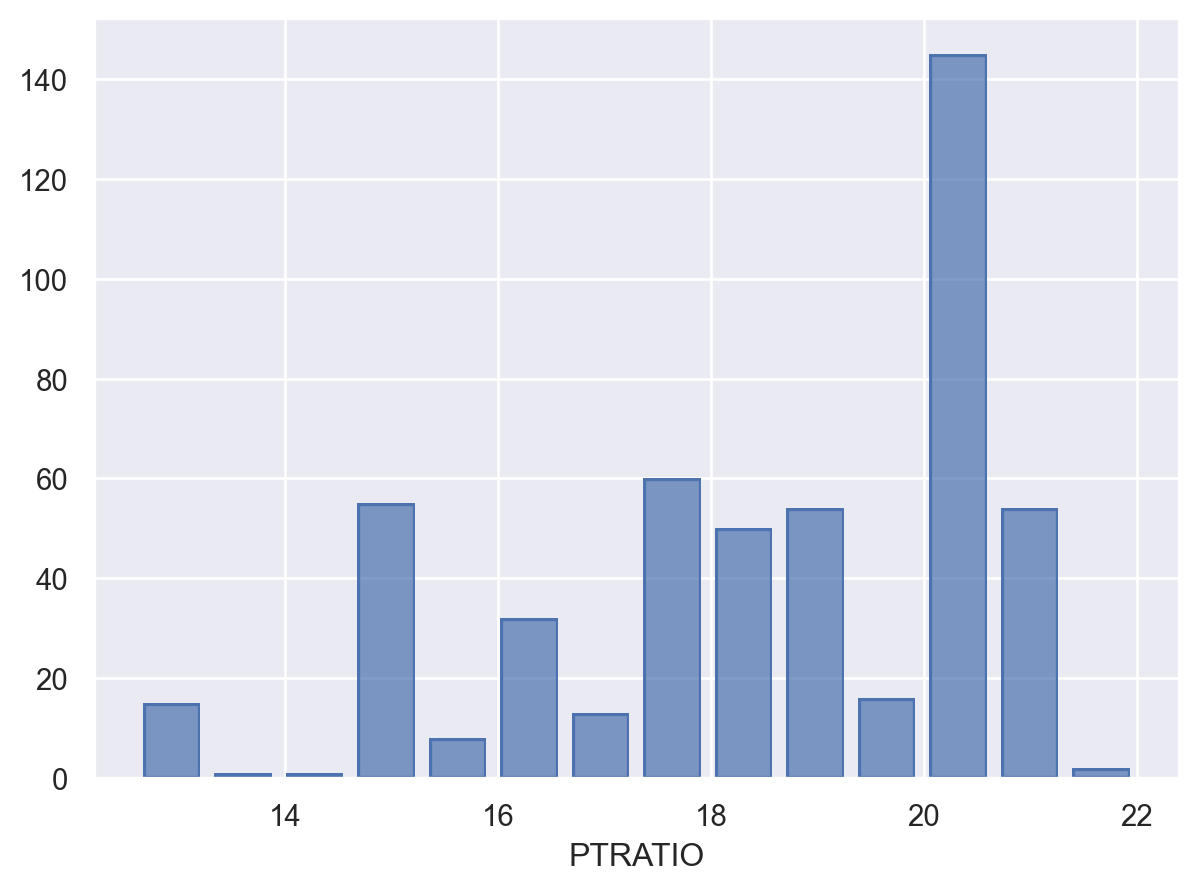

In [9]:
#Create a histogram for the pupil to teacher ratio variable
so.Plot(boston_df, "PTRATIO").add(so.Bar(), so.Hist())

In [10]:
#Using tests for Task 3
#1.State your hypothesis.
#2.Use α = 0.05
α = 0.05
#3.Perform the test Statistics.
#4.State the conclusion from the test.

In [11]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)

#1.State your hypothesis.
    #Hypothesis, mean of median value of houses bounded by the charles river and not bounded are the same
    #alternate hypothesis, the difference in means is not equal to 0

#2.Use α = 0.05
α = 0.05

#3.Perform the test Statistics.
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

#4.State the conclusion from the test.
    #Results: Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)
    #p-value is less than alpha so we reject the null hypothesis and there is a significant difference between bounded
    #and unbounded houses.

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [20]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built 
#prior to 1940 (AGE)? (ANOVA)

#1.State your hypothesis.
    #MEDV mean is equal for each proportion of owner occupied units built before 1940.
    
#2.Use α = 0.05
α = 0.05

#3.Perform the test Statistics.
    #Group up data based on age groups
thirtyfive_lower = boston_df.loc[boston_df['AGE'] < 35, 'MEDV']
thirtyfive_seventy = boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'MEDV']
seventy_older = boston_df.loc[boston_df['AGE'] > 70, 'MEDV']

    #Resetting index
thirtyfive_lower = thirtyfive_lower.reset_index(drop=True)
thirtyfive_seventy = thirtyfive_seventy.reset_index(drop=True)
seventy_older = seventy_older.reset_index(drop=True)

    #Running ANOVA to compare means
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print('F_Statistic: {0}, P-Value: {1}'.format(f_statistic,p_value))

#4.State the conclusion from the test.
    #Results: F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
    #p-value is less than 0.05 so we reject the null hypothesis and there is a significant difference between MEDV based on AGE

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [22]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion 
#of non-retail business acres per town(INDUS)? (Pearson Correlation)

#1.State your hypothesis.
    #There is no correlation between Nitric Oxide Concentrations and Proportion of non-retail business acres per town
    
#2.Use α = 0.05
α = 0.05

#3.Perform the test Statistics.
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#4.State the conclusion from the test.
    #Results: PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)
    #P-value is less than 0.05 so we reject the null hypothesis and there is a significant relationship between
    #NOX and INDUS. This is also shown in the statistic value being a positive .76 which is a positive relationship slope

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

In [24]:
#What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the median 
#value of owner occupied homes(MEDV)? (Regression analysis)

#1.State your hypothesis.
    #There is no linear dependence between the two variables
    
#2.Use α = 0.05
α = 0.05

#3.Perform the test Statistics.
x = boston_df['DIS']
y = boston_df['MEDV']

result = scipy.stats.linregress(x,y)

#4.State the conclusion from the test.
    #Results:LinregressResult(slope=1.0916130158411095, 
    #intercept=18.390088330493384, rvalue=0.24992873408590388, 
    #pvalue=1.2066117273371223e-08, stderr=0.18837841478683107, intercept_stderr=0.8173887085024752)
    #pvalue is less than 0.05 so we reject the null hypothesis and there is a significant impact between DIS and MEDV